## Startup Health Scoring Model – ScaleDux Internship Task

### Objective

#### The goal of this project is to create a clear and reproducible method for generating a composite score (out of 100) for each startup in the dataset. This score will be based on key business metrics and will help compare the overall health and growth potential of different startups, similar to a credit score.

#### Step 1: Import Libraries and Load Data

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Startup_Scoring_Dataset.csv")
df.head()

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,7,789,66299,6091495,4183839,263247468
1,S002,4,939,34866,9106842,666326,172927107
2,S003,8,42,73630,8817088,649150,313090455
3,S004,5,57,93657,6374167,20153173,305887183
4,S005,7,512,61187,841971,118834,84815222


#### Step 2: Normalize the Data (Min-Max Scaling)

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the original data
df_norm = df.copy()

# List of features to normalize
features = [
    "team_experience",
    "market_size_million_usd",
    "monthly_active_users",
    "monthly_burn_rate_inr",
    "funds_raised_inr",
    "valuation_inr"
]

In [14]:
# Apply Min-Max normalization
scaler = MinMaxScaler()
df_norm[features] = scaler.fit_transform(df_norm[features])

# Invert burn rate since lower is better
df_norm["monthly_burn_rate_inr"] = 1 - df_norm["monthly_burn_rate_inr"]

df_norm.head()

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,0.666667,0.789206,0.669162,0.393230,0.082061,0.518992
1,S002,0.333333,0.941955,0.347274,0.084439,0.011052,0.333843
2,S003,0.777778,0.028513,0.744235,0.114112,0.010706,0.621166
3,S004,0.444444,0.043788,0.949320,0.364283,0.404435,0.606400
4,S005,0.666667,0.507128,0.616813,0.930815,0.000000,0.153220


#### Step 3: Define Weights and Calculate Final Score

In [17]:
# Define weights for each feature (must add up to 1)
weights = {
    "team_experience": 0.15,
    "market_size_million_usd": 0.15,
    "monthly_active_users": 0.20,
    "monthly_burn_rate_inr": 0.10,
    "funds_raised_inr": 0.20,
    "valuation_inr": 0.20
}

In [19]:
# Calculate weighted score
df_norm["final_score"] = (
    df_norm["team_experience"] * weights["team_experience"] +
    df_norm["market_size_million_usd"] * weights["market_size_million_usd"] +
    df_norm["monthly_active_users"] * weights["monthly_active_users"] +
    df_norm["monthly_burn_rate_inr"] * weights["monthly_burn_rate_inr"] +
    df_norm["funds_raised_inr"] * weights["funds_raised_inr"] +
    df_norm["valuation_inr"] * weights["valuation_inr"]
) * 100

df_norm[["startup_id", "final_score"]].head()

,startup_id,final_score
0,S001,51.174679
1,S002,33.817098
2,S003,40.757610
3,S004,50.169418
4,S005,42.315739


#### Step 4: Rank Startups – Top 10 & Bottom 10

In [22]:
# Sort by final score
df_ranked = df_norm.sort_values(by="final_score", ascending=False).reset_index(drop=True)

# Top 10
print("Top 10 Startups:")
print(df_ranked[["startup_id", "final_score"]].head(10))

# Bottom 10
print("\nBottom 10 Startups:")
print(df_ranked[["startup_id", "final_score"]].tail(10))

Top 10 Startups:
  startup_id  final_score
0       S006    82.102635
1       S077    79.592256
2       S033    76.276926
3       S045    75.428024
4       S013    73.449911
5       S059    71.981939
6       S043    71.728178
7       S008    71.698273
8       S029    71.617915
9       S097    68.993832

Bottom 10 Startups:
   startup_id  final_score
90       S095    32.805041
91       S084    32.311993
92       S079    31.980131
93       S051    30.879391
94       S091    29.831156
95       S017    29.657341
96       S023    28.374700
97       S058    27.385541
98       S098    25.915250
99       S055    18.471475


#### Step 5: Visualizations

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

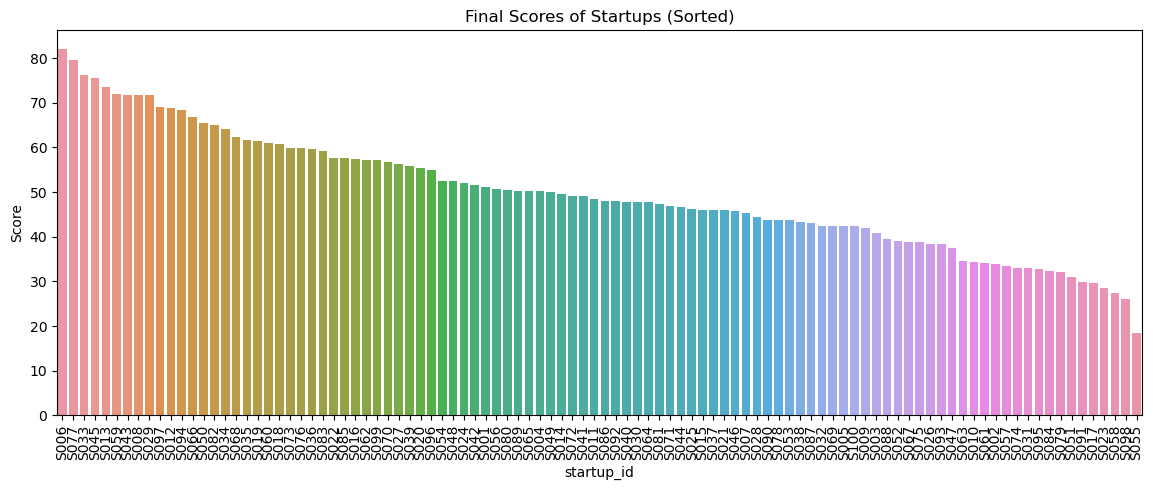

In [53]:
# Bar chart of scores
plt.figure(figsize=(14, 5))
sns.barplot(x=df_ranked["startup_id"], y=df_ranked["final_score"])
plt.xticks(rotation=90)
plt.title("Final Scores of Startups (Sorted)")
plt.ylabel("Score")
plt.show()

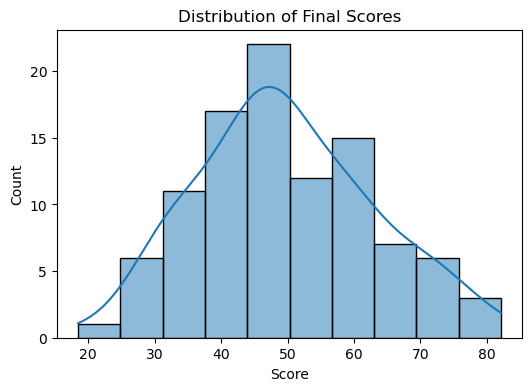

In [55]:
# Score distribution
plt.figure(figsize=(6, 4))
sns.histplot(df_ranked["final_score"], bins=10, kde=True)
plt.title("Distribution of Final Scores")
plt.xlabel("Score")
plt.show()

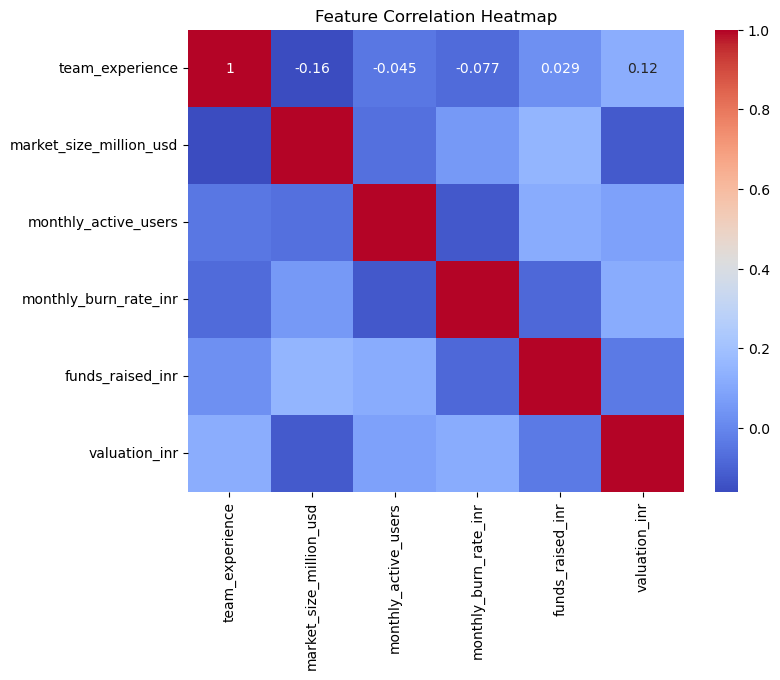

In [57]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

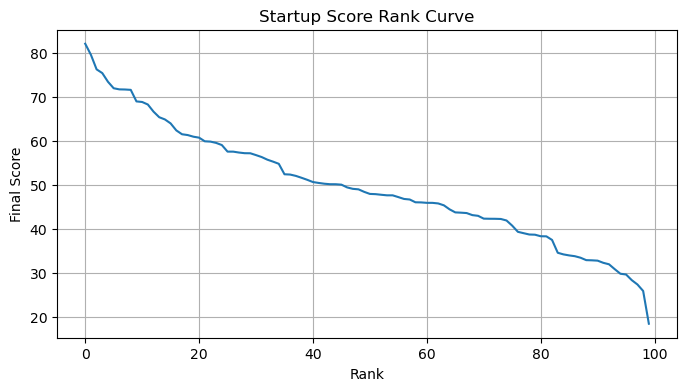

In [71]:
# Shows how scores decline across ranks.
plt.figure(figsize=(8, 4))
plt.plot(df_ranked["final_score"].values)
plt.title("Startup Score Rank Curve")
plt.xlabel("Rank")
plt.ylabel("Final Score")
plt.grid(True)
plt.show()

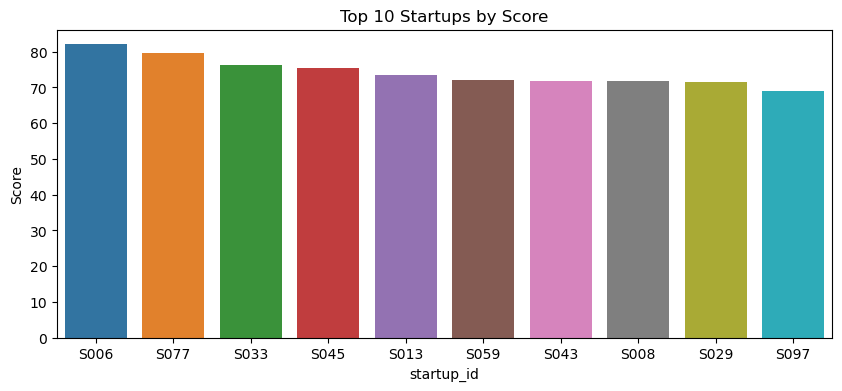

In [69]:
# More focus on top performers.
top10 = df_ranked.head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top10["startup_id"], y=top10["final_score"])
plt.title("Top 10 Startups by Score")
plt.ylabel("Score")
plt.show()

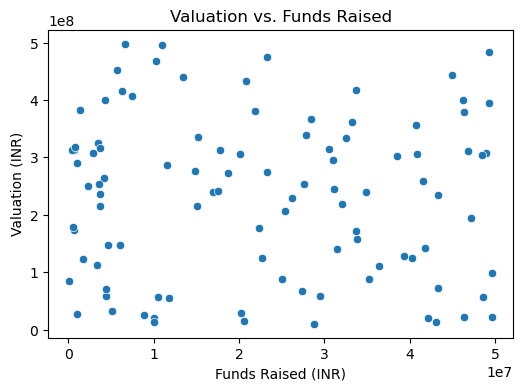

In [67]:
# Shows how valuation relates to funding.
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="funds_raised_inr", y="valuation_inr")
plt.title("Valuation vs. Funds Raised")
plt.xlabel("Funds Raised (INR)")
plt.ylabel("Valuation (INR)")
plt.show()